In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import ensemble
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support


In [4]:
import xgboost

from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [13]:
xgb ='yay'

In [7]:
df=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_set.csv')
df_ROS=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_ROS.csv')
df_RUS=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_RUS.csv')
df_SMOTE=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_SMOTE.csv')
df_cnn=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_cnn.csv')
df_test=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\test_set.csv')
df_validation=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\validation_set.csv')
x_val=df_validation.iloc[:,:-1]
y_val=df_validation.iloc[:,-1]
x_train=df.iloc[:,:-1]
y_train=df.iloc[:,-1]
x_ov=df_ROS.iloc[:,:-1]
y_ov=df_ROS.iloc[:,-1]
x_test=df_test.iloc[:,:-1]
y_test=df_test.iloc[:,-1]
x_under = df_RUS.iloc[:,:-1]
y_under=df_RUS.iloc[:,-1]
x_smote=df_SMOTE.iloc[:,:-1]
y_smote=df_SMOTE.iloc[:,-1]
x_cnn=df_cnn.iloc[:,:-1]
y_cnn=df_cnn.iloc[:,-1]

In [38]:
clf =tree.DecisionTreeClassifier()
ada = AdaBoostClassifier()
rfc =ensemble.RandomForestClassifier()
gbc=GradientBoostingClassifier()

In [39]:
from sklearn import metrics

sampling_methods =['No Sampling','Over Sampling','Under Sampling', 'SMOTE Sampling','CNN Sampling']
sampling_methods1x =[x_train,x_ov,x_under,x_smote,x_cnn]
sampling_methods1y=[y_train,y_ov, y_under, y_smote, y_cnn]
ml_methods=[clf,rfc,ada,gbc]
label=['dec tree','rfc','ada','gradboost']
dict1 ={'precision': {'No Sampling': [],'Over Sampling':[], 'Under Sampling':[], 'SMOTE Sampling':[], 'CNN Sampling':[]},'recall': {'No Sampling': [],'Over Sampling':[], 'Under Sampling':[], 'SMOTE Sampling':[], 'CNN Sampling':[]}, 'f1':{'No Sampling': [],'Over Sampling':[], 'Under Sampling':[], 'SMOTE Sampling':[], 'CNN Sampling':[]}}
for j in range(len(ml_methods)):
    ml =ml_methods[j]
    label[j]
    print(ml)
    for i in range(len(sampling_methods)):
        #print(sampling_methods[i])
        model=ml.fit(sampling_methods1x[i],sampling_methods1y[i])
        y_pred =model.predict(x_test)
        precision,recall,f1,none =precision_recall_fscore_support(y_pred,y_test,average='weighted')
        accuracy =accuracy_score(y_pred,y_test)
        dict1['precision'][sampling_methods[i]].append(precision)
        dict1['recall'][sampling_methods[i]].append(recall)
        dict1['f1'][sampling_methods[i]].append(f1)
print(dict1)

DecisionTreeClassifier()
RandomForestClassifier()
AdaBoostClassifier()
GradientBoostingClassifier()
{'precision': {'No Sampling': [0.7180142086243549, 0.8680188981044069, 0.889237036346736, 0.8788672740784282], 'Over Sampling': [0.7169067878622785, 0.8379688074227534, 0.7336534503234192, 0.737766554758258], 'Under Sampling': [0.6283174503043032, 0.7300660716803227, 0.7237987369085084, 0.7316465841650797], 'SMOTE Sampling': [0.684773233738832, 0.8066016358540204, 0.7452449784188018, 0.8044826127785862], 'CNN Sampling': [0.6010079772774158, 0.7614588810274228, 0.793477452247766, 0.796461601715982]}, 'recall': {'No Sampling': [0.7268888888888889, 0.8173333333333334, 0.8186666666666667, 0.8246666666666667], 'Over Sampling': [0.7222222222222222, 0.8113333333333334, 0.7455555555555555, 0.7495555555555555], 'Under Sampling': [0.6188888888888889, 0.7393333333333333, 0.7353333333333333, 0.7428888888888889], 'SMOTE Sampling': [0.7042222222222222, 0.798, 0.7582222222222222, 0.7962222222222223], '

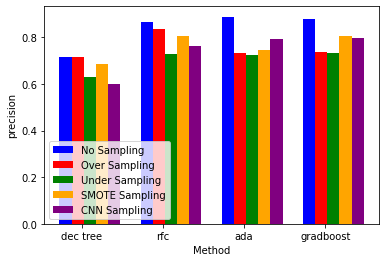

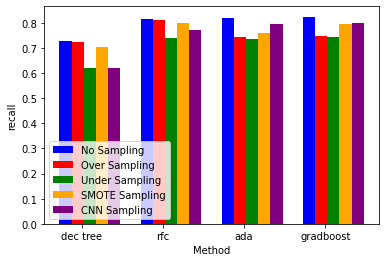

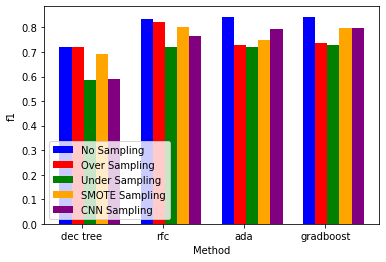

In [41]:
evaluation_metric= ['precision','recall','f1']
x=np.arange(4)
width=0.15
for n in evaluation_metric:
    plt.bar(x-0.2, dict1[n]['No Sampling'], width,color='blue')
    plt.bar(x-0.05, dict1[n]['Over Sampling'], width,color ='red')
    plt.bar(x+0.1, dict1[n]['Under Sampling'],width,color='green')
    plt.bar(x+0.25, dict1[n]['SMOTE Sampling'], width,color='orange')
    plt.bar(x+0.4, dict1[n]['CNN Sampling'], width,color='purple')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    plt.ylabel(n)
    plt.xlabel('Method')
    plt.xticks(x,label)
    plt.legend(sampling_methods,loc='lower left')
    plt.show()

In [5]:
clf =tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf= 2, min_samples_split= 2)
ada = AdaBoostClassifier(learning_rate= 0.8, n_estimators= 50)
rfc =ensemble.RandomForestClassifier(class_weight= None, criterion= 'gini', n_estimators= 200)
gbc=GradientBoostingClassifier()

In [30]:
sampling_methods =['No Sampling','Over Sampling','Under Sampling', 'SMOTE Sampling','CNN Sampling']
sampling_methods1x =[x_train,x_ov,x_under,x_smote,x_cnn]
sampling_methods1y=[y_train,y_ov, y_under, y_smote, y_cnn]
ml_methods=[clf,rfc,ada,gbc]
label=['Decision Tree','Random Forest','AdaBoost','GradientBoost']
dict1 ={'Accuracy Score': {'No Sampling': [],'Over Sampling':[], 'Under Sampling':[], 'SMOTE Sampling':[], 'CNN Sampling':[]}, 'F1 Score':{'No Sampling': [],'Over Sampling':[], 'Under Sampling':[], 'SMOTE Sampling':[], 'CNN Sampling':[]}}
for j in range(len(ml_methods)):
    ml =ml_methods[j]
    label[j]
    print(ml)
    for i in range(len(sampling_methods)):
        #print(sampling_methods[i])
        model=ml.fit(sampling_methods1x[i],sampling_methods1y[i])
        y_pred =model.predict(x_test)
        precision,recall,f1,none =precision_recall_fscore_support(y_pred,y_test,average='weighted')
        accuracy =accuracy_score(y_pred,y_test)
        dict1['Accuracy Score'][sampling_methods[i]].append(accuracy)
        #dict1['recall'][sampling_methods[i]].append(recall)
        dict1['F1 Score'][sampling_methods[i]].append(f1)
        
print(dict1)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)
RandomForestClassifier(n_estimators=200)
AdaBoostClassifier(learning_rate=0.8)
GradientBoostingClassifier()
{'Accuracy Score': {'No Sampling': [0.822, 0.8193333333333334, 0.8184444444444444, 0.8248888888888889], 'Over Sampling': [0.7782222222222223, 0.8128888888888889, 0.7588888888888888, 0.7495555555555555], 'Under Sampling': [0.7782222222222223, 0.7351111111111112, 0.7464444444444445, 0.7431111111111111], 'SMOTE Sampling': [0.7782222222222223, 0.7997777777777778, 0.7568888888888889, 0.7962222222222223], 'CNN Sampling': [0.8106666666666666, 0.7777777777777778, 0.8031111111111111, 0.798]}, 'F1 Score': {'No Sampling': [0.8472660099958835, 0.8374814345264558, 0.8436407812763284, 0.8440836627481114], 'Over Sampling': [0.7745898764545196, 0.8224296757707341, 0.7470203062706613, 0.7352024301323696], 'Under Sampling': [0.7745898764545196, 0.7181662696190402, 0.7320904429026259, 0.7275503191298094], 'SMOTE Sampling': [0.7745898764545196,

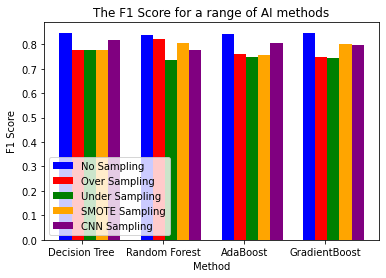

In [33]:
evaluation_metric= ['Accuracy Score','F1 Score']
x=np.arange(4)
width=0.15
g=".png"
for n in evaluation_metric:
    plt.bar(x-0.2, dict1[n]['No Sampling'], width,color='blue')
    plt.bar(x-0.05, dict1[n]['Over Sampling'], width,color ='red')
    plt.bar(x+0.1, dict1[n]['Under Sampling'],width,color='green')
    plt.bar(x+0.25, dict1[n]['SMOTE Sampling'], width,color='orange')
    plt.bar(x+0.4, dict1[n]['CNN Sampling'], width,color='purple')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    plt.ylabel(n)
    plt.xlabel('Method')
    plt.xticks(x,label)
    plt.title('The ' +str(n) +' for a range of AI methods')
    plt.legend(sampling_methods,loc='lower left')
    plt.savefig("".join((n,g)))

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
#decision tree optimise parameters _param_grid = {'splitter':['best','random'],'criterion': ['entropy', 'gini'],'class_weight' : ['balanced',None]}
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}
grid_search_dt = GridSearchCV(estimator=clf,param_grid=parameters,scoring = 'f1_weighted',cv=5,n_jobs=-1)
grid_search_dt = grid_search_dt.fit(x_val,y_val)

In [19]:
best_f1_dt = grid_search_dt.best_score_
print('f1 on Cross Validation set :',best_f1_dt)
best_parameters_1 = grid_search_dt.best_params_
best_parameters_1

f1 on Cross Validation set : 0.7887348365458788


{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [20]:
y_pred_dct_tuned = grid_search_dt.predict(x_test)
precision_dct,recall_dct,f1_dct,none =precision_recall_fscore_support(y_pred_dct_tuned,y_test,average='weighted')
accuracy_dct =accuracy_score(y_pred_dct_tuned,y_test)

In [22]:
model_results =  pd.DataFrame([['Decision Tree Tuned', accuracy_dct,precision_dct,recall_dct, f1_dct]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree Tuned,0.821778,0.891357,0.821778,0.846302


In [23]:
param_grid_rfc = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}
grid_search_rfc = GridSearchCV(estimator=rfc,param_grid=param_grid_rfc,scoring='f1_weighted',cv=5,n_jobs=-1)
grid_search_rfc = grid_search_rfc.fit(x_val,y_val)

In [25]:
best_f1_rfc = grid_search_rfc.best_score_
print('f1 on Cross Validation set :',best_f1_rfc)
best_parameters_2 = grid_search_rfc.best_params_
best_parameters_2

f1 on Cross Validation set : 0.7942381006304594


{'class_weight': None, 'criterion': 'gini', 'n_estimators': 200}

In [26]:
y_pred_rfc_tuned = grid_search_rfc.predict(x_test)

In [27]:
precision_rfc,recall_rfc,f1_rfc,none =precision_recall_fscore_support(y_pred_rfc_tuned,y_test,average='weighted')
accuracy_rfc =accuracy_score(y_pred_rfc_tuned,y_test)
model_rfc=  pd.DataFrame([['Random Forest Tuned', accuracy_rfc,precision_rfc,recall_rfc, f1_rfc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_rfc

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest Tuned,0.813333,0.85886,0.813333,0.830325


In [28]:
model_results = model_results.append(model_rfc, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree Tuned,0.821778,0.891357,0.821778,0.846302
1,Random Forest Tuned,0.813333,0.858860,0.813333,0.830325


In [29]:
param_grid_ada = {'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], 
              'n_estimators': [50,60,70,80,90,100,150, 200]}
grid_search_ada = GridSearchCV(estimator=ada,param_grid=param_grid_ada,scoring='f1',cv=5,n_jobs=-1)
grid_search_ada = grid_search_ada.fit(x_val,y_val)

In [30]:
best_f1_ada = grid_search_ada.best_score_
print('f1 on Cross Validation set :',best_f1_ada)
best_parameters_3 = grid_search_ada.best_params_
best_parameters_3
y_pred_ada_tuned = grid_search_ada.predict(x_test)
precision_ada,recall_ada,f1_ada,none =precision_recall_fscore_support(y_pred_ada_tuned,y_test,average='weighted')
accuracy_ada =accuracy_score(y_pred_ada_tuned,y_test)
model_ada=  pd.DataFrame([['AdaBoost tuned', accuracy_ada,precision_ada,recall_ada, f1_ada]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_ada

f1 on Cross Validation set : 0.44700737418721725


,Model,Accuracy,Precision,Recall,F1 Score
0,AdaBoost tuned,0.819556,0.878197,0.819556,0.840606


In [31]:
model_results = model_results.append(model_ada, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree Tuned,0.821778,0.891357,0.821778,0.846302
1,Random Forest Tuned,0.813333,0.858860,0.813333,0.830325
2,AdaBoost tuned,0.819556,0.878197,0.819556,0.840606


In [34]:
best_parameters_3

{'learning_rate': 0.8, 'n_estimators': 50}

In [ ]:
param_grid_gbc = {'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], 
                  'n_estimators': [50,60,70,80,90,100,150, 200],
                  'criterion':['friedman_mse', 'squared_error', 'mse', 'mae']}
grid_search_gbc = GridSearchCV(estimator=gbc,param_grid=param_grid_gbc,scoring='f1',cv=5,n_jobs=-1)
grid_search_gbc = grid_search_gbc.fit(x_val,y_val)

In [ ]:
best_f1_gbc = grid_search_gbc.best_score_
print('f1 on Cross Validation set :',best_f1_gbc)
best_parameters_4 = grid_search_gbc.best_params_
best_parameters_4
y_pred_gbc_tuned = grid_search_gbc.predict(x_test)
precision_gbc,recall_gbc,f1_gbc,none =precision_recall_fscore_support(y_pred_gbc_tuned,y_test,average='weighted')
accuracy_gbc =accuracy_score(y_pred_gbc_tuned,y_test)
model_gbc=  pd.DataFrame([['Gradient Boosted Decision Tree', accuracy_gbc,precision_gbc,recall_gbc, f1_gbc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_gbc

In [ ]:
model_results = model_results.append(model_gbc, ignore_index = True)
model_results
df.to_csv('file_name.csv')

In [ ]:
#now i just need to plot ROC Curves and plot new scores on 